# Convolutional neural networks (CNNs)

State-of-the-art image classification is performed with [convolutional neural networks](https://en.wikipedia.org/wiki/Convolutional_neural_network) (CNNs) that use [convolution layers](https://machinelearningmastery.com/convolutional-layers-for-deep-learning-neural-networks/) to extract features from images and [pooling layers](https://machinelearningmastery.com/pooling-layers-for-convolutional-neural-networks/) to downsize images so features can be detected at various resolutions. Let's use Keras to build a CNN and train it to differentiate between photos containing Arctic foxes, polar bears, and walruses. CNNs perform best when trained with thousands (or tens of thousands) of images per class. In this example, we'll use 300 images for training (100 per class) and 120 for testing.

![](Images/cnn.png)

## Load training and testing images

The first step is to load the images that will be used for training and testing and to label the images with 0 for Arctic foxes, 1 for polar bears, and 2 for walruses. We'll start by defining a function for loading images from the file system and affixing labels to them, and another function for displaying images. We will also define four Python lists to hold the images used for training and testing (`x_train` and `x_test`) and the labels used for training and testing (`y_train` and `y_test`).

In [1]:
import os
import numpy as np
from keras.preprocessing import image
import matplotlib.pyplot as plt
%matplotlib inline

def load_images_from_path(path, label):
    images = []
    labels = []

    for file in os.listdir(path):
        img = image.load_img(os.path.join(path, file), target_size=(224, 224, 3))
        images.append(image.img_to_array(img))
        labels.append((label))

    return images, labels

def show_images(images):
    fig, axes = plt.subplots(1, 8, figsize=(20, 20), subplot_kw={'xticks': [], 'yticks': []})

    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i] / 255)

x_train = []
y_train = []
x_test = []
y_test = []

Load Arctic-fox training images and show the first few.

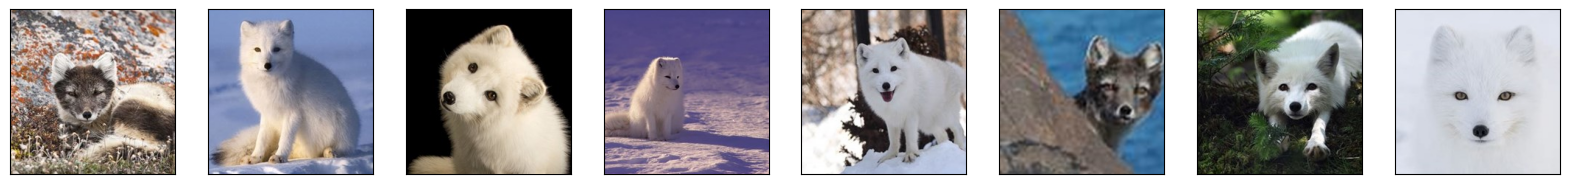

In [2]:
images, labels = load_images_from_path('Data/train/arctic_fox', 0)
show_images(images)

x_train += images
y_train += labels

Load polar-bear training images.

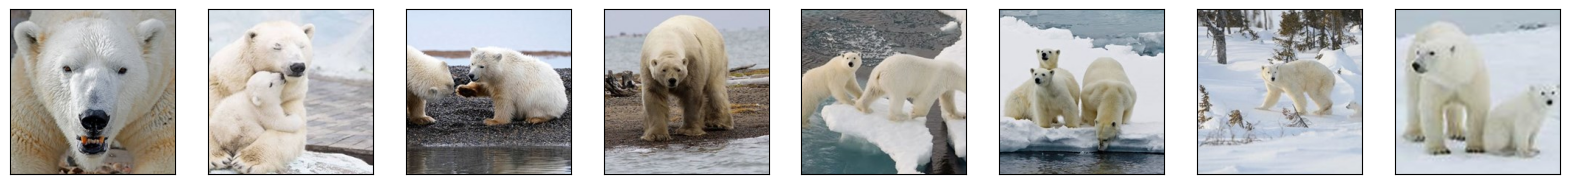

In [3]:
images, labels = load_images_from_path('Data/train/polar_bear', 1)
show_images(images)

x_train += images
y_train += labels

Load walrus training images.

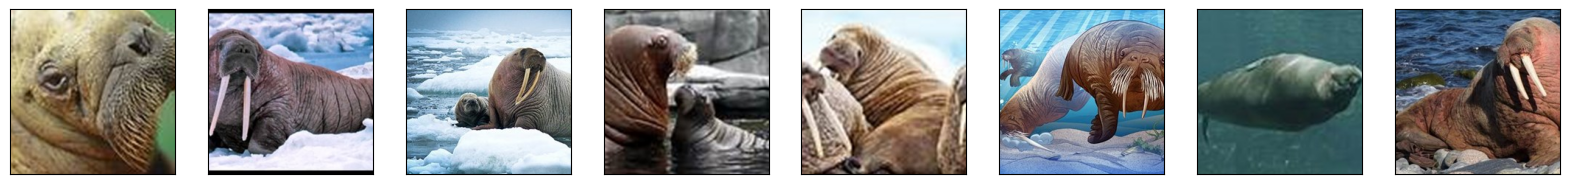

In [4]:
images, labels = load_images_from_path('Data/train/walrus', 2)
show_images(images)

x_train += images
y_train += labels

Now load Arctic-fox test images and show the first few.

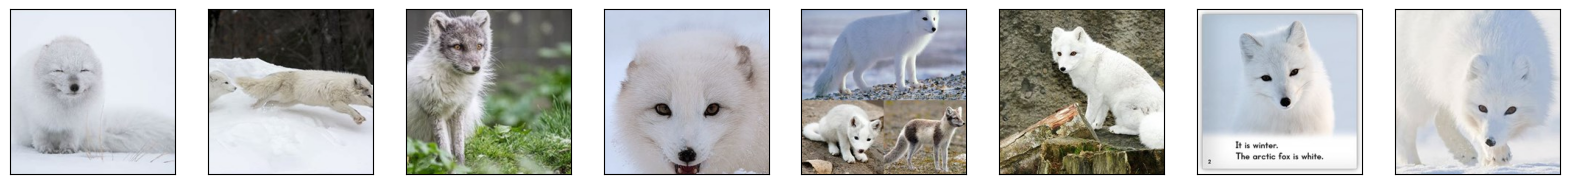

In [6]:
images, labels = load_images_from_path('Data/test/arctic_fox', 0)
show_images(images)

x_test += images
y_test += labels

Load polar-bear test images.

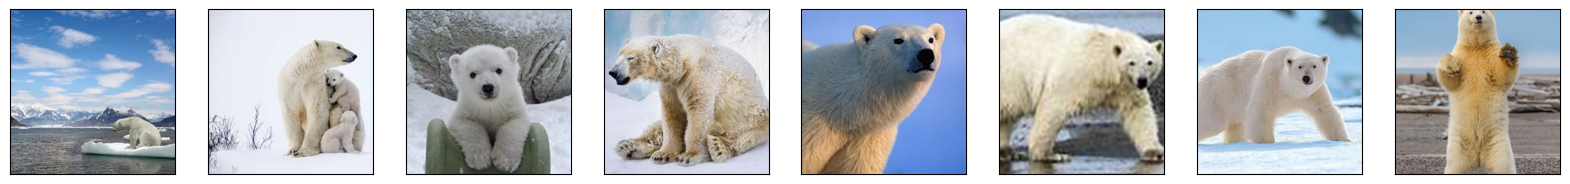

In [7]:
images, labels = load_images_from_path('Data/test/polar_bear', 1)
show_images(images)

x_test += images
y_test += labels

Load walrus test images.

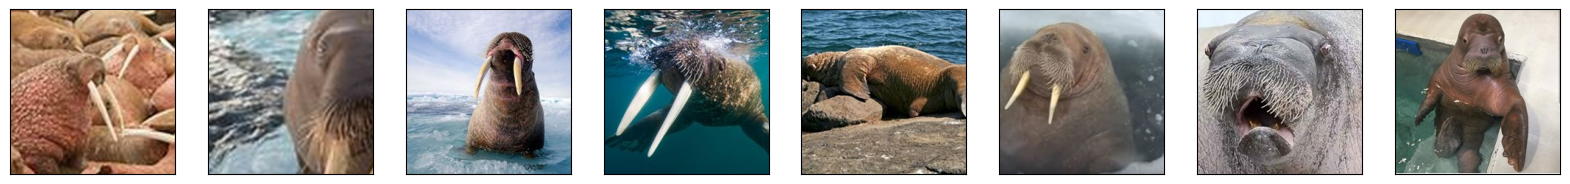

In [8]:
images, labels = load_images_from_path('Data/test/walrus', 2)
show_images(images)

x_test += images
y_test += labels

Preprocess the training and testing images, and use Keras's [`to_categorical`](https://keras.io/api/utils/python_utils/#to_categorical-function) function to one-hot-encode the training and testing labels.

In [9]:
from tensorflow.keras.utils import to_categorical

x_train = np.array(x_train) / 255
x_test = np.array(x_test) / 255

y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

## Build and train a CNN

Keras makes it easy to build and train CNNs using classes such as [Conv2D](https://keras.io/api/layers/convolution_layers/convolution2d/#conv2d-class) and [MaxPooling2D](https://keras.io/api/layers/pooling_layers/max_pooling2d/#maxpooling2d-class). Let's build a CNN with four convolutional layers, followed by a pair of fully connected layers for classification.

In [10]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Flatten, Dense

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 128)       │          36,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 24, 24, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 18432)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1024)                │      18,875,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │           3,075 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,211,523 (73.29 MB)

 Trainable params: 19,211,523 (73.29 MB)

 Non-trainable params: 0 (0.00 B)

Train the model by calling [`fit`](https://keras.io/api/models/model_training_apis/#fit-method).

In [11]:
hist = model.fit(x_train, y_train_encoded, validation_data=(x_test, y_test_encoded), batch_size=10, epochs=10)

Epoch 1/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 70s 2s/step - accuracy: 0.3413 - loss: 1.9230 - val_accuracy: 0.3500 - val_loss: 1.0953
Epoch 2/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - accuracy: 0.5281 - loss: 0.9856 - val_accuracy: 0.6583 - val_loss: 0.7850
Epoch 3/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - accuracy: 0.6056 - loss: 0.8159 - val_accuracy: 0.6667 - val_loss: 0.7401
Epoch 4/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 86s 2s/step - accuracy: 0.7406 - loss: 0.5898 - val_accuracy: 0.6583 - val_loss: 0.7999
Epoch 5/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 76s 2s/step - accuracy: 0.6809 - loss: 0.6517 - val_accuracy: 0.6500 - val_loss: 0.7956
Epoch 6/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - accuracy: 0.7060 - loss: 0.5932 - val_accuracy: 0.5750 - val_loss: 0.9772
Epoch 7/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 84s 2s/step - accuracy: 0.7281 - loss: 0.5262 - val_accuracy: 0.6167 - val_loss: 1.0267
Epoch 8/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 79s 2s/step - accuracy: 0.7785 - loss: 0.5210 - val_accuracy: 0.6167 - val_loss:

How well did the CNN train? Let's plot the training accuracy and validation accuracy for each epoch.

[]

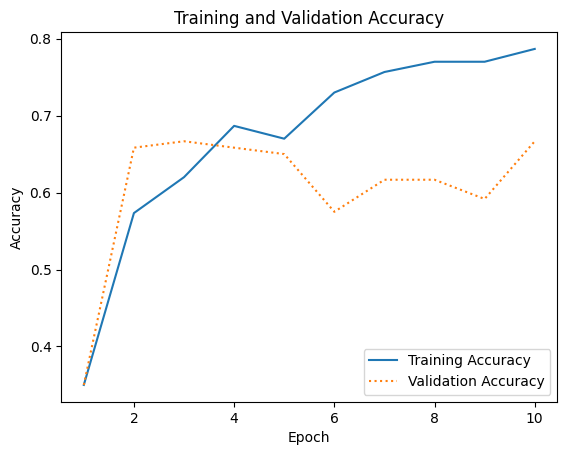

In [12]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, '-', label='Training Accuracy')
plt.plot(epochs, val_acc, ':', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

The validation accuracy is decent, but it's not state-of-the art. Modern CNNs often achieve an accuracy of 95% or more doing image classification. You could increase the accuracy by increasing the number of training images by an order of magnitude or more, but training time would increase commensurately. One solution for that is to do the training on an HPC cluster outfitted with GPUs. A more practical solution is [transfer learning](https://towardsdatascience.com/a-comprehensive-hands-on-guide-to-transfer-learning-with-real-world-applications-in-deep-learning-212bf3b2f27a), which enables sophisticated image-classification networks to be trained on an ordinary CPU.